# Simulation exercise: part 1

## Use loops and numpy to simulate a game of chance
The game is to do with rolling a dice, and then progressing up an infinite set of stairs depending on your roll. We are trying to establish the chances of being above 60 given 100 rolls. One thing that we are definitely going to need is the ability to generate random numbers. We can do this using the `random` part of the `numpy` package. This is an exercise that was part of the __Intermediate Python for Data Science__ course on [DataCamp](www.datacamp.com).

- - - -
The game has the following rules:
- If you roll a 1 or a 2 then you move back a step
- If you roll 3, 4, 5 then you move up a single step
- If you roll a 6 then you roll again and move that number of steps
- You cannot go below step 0
- Each roll there is a 0.1% chance that you will fall and set your steps to 0
- - - -

I'll go through these rules and add them sequentially to the code.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set seed for reproducability
np.random.seed(2018)
np.random.rand()

0.8823493117539459

You can, alternatively, use the function to generate an array of random numbers as shown below. 

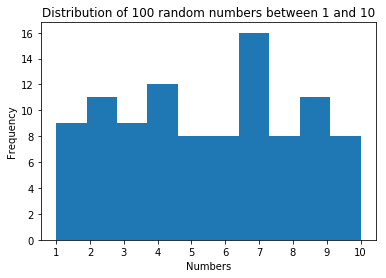

In [3]:
random_numbers = np.random.randint(1, 11, size = 100)
plt.hist(random_numbers, bins = 10)
plt.xticks(range(1,11))
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.title('Distribution of 100 random numbers between 1 and 10')
plt.show()

Since this is a dice game, we are going to have to simulate a random number between 1 and 6 inclusive. To do this in python you use the `randint` function to generate the number with the limits of 1 and 7. The upper bound of the random generation isn't included while the lower bound is. 

In [4]:
# Check the output
for i in range(10):
    print(np.random.randint(1,7))

1
3
6
3
6
3
1
3
2
2


That seems to be working as intended!<br> 

### Starting the game mechanics
We are going to use a conditional `else`, `elif`, `if` structure to calculate the options for the steps and track the progress of the player as they go up the steps. 

In [5]:
step = 0
for i in range(25):
    score = np.random.randint(1,7)
    if score < 3:
        step = step - 1
    elif score < 6:
        step = step + 1
    else:
        # Score must equal 6 here
        step = step + np.random.randint(1,7)

# View the final score
print(step)

12


It would be good if we could track the progress of the player throughout the game however...

In [6]:
np.random.seed(2)
steps = [0]
for i in range(25):
    # Get the current position of the player
    current_position = steps[-1]
    # Generate our roll
    score = np.random.randint(1,7)
    if score < 3:
        step = current_position - 1
    elif score < 6:
        step = current_position + 1
    else:
        # Score must equal 6 here
        step = current_position + np.random.randint(1,7)
        
    steps.append(step)

# View the final score
print(steps)

[0, -1, 0, 1, 2, 3, 2, 3, 2, 3, 6, 7, 8, 9, 13, 14, 15, 16, 17, 18, 17, 18, 19, 20, 21, 22]


You can see here that they have somehow ended up negative... That shouldn't be possible because you start at the bottom of a stair, and there is nowhere to go but up! <br>
To fix that we will have to consider that within the `score < 3` part of the if statement. 

In [7]:
np.random.seed(2)
steps = [0]
for i in range(25):
    # Get the current position of the player
    current_position = steps[-1]
    # Generate our roll
    score = np.random.randint(1,7)
    if score < 3:
        step = max(0, current_position - 1)
    elif score < 6:
        step = current_position + 1
    else:
        # Score must equal 6 here
        step = current_position + np.random.randint(1,7)
        
    steps.append(step)

# View the final score
print(steps)

[0, 0, 1, 2, 3, 4, 3, 4, 3, 4, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 18, 19, 20, 21, 22, 23]


You can see here that the first roll that previously resulted in a negative result here has been replaced with another 0, telling us that the player didn't move at all. <br>
### Visualising a game
We can use `matplotlib.pyplot` to visualise the game and the progress that was made. `


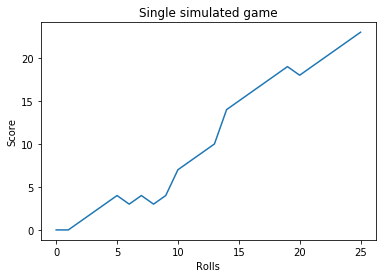

In [8]:
plt.plot(steps)
plt.title('Single simulated game')
plt.xlabel('Rolls')
plt.ylabel('Score')
plt.show()

### Simulating multiple games 

In [9]:
np.random.seed(2)
all_games = []
for i in range(10):
    steps =[0]
    # Generate our roll
    for i in range(25):
        # Get the current position of the player
        current_position = steps[-1]
        # Generate our roll
        score = np.random.randint(1,7)
        if score < 3:
            step = max(0, current_position - 1)
        elif score < 6:
            step = current_position + 1
        else:
            # Score must equal 6 here
            step = current_position + np.random.randint(1,7)
        
        steps.append(step)
        
    all_games.append(steps)

# View the final score
print(all_games)

[[0, 0, 1, 2, 3, 4, 3, 4, 3, 4, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 18, 19, 20, 21, 22, 23], [0, 1, 0, 1, 0, 1, 2, 3, 4, 5, 4, 3, 4, 7, 6, 7, 6, 5, 6, 8, 7, 6, 7, 8, 9, 8], [0, 1, 0, 1, 2, 1, 2, 3, 2, 3, 4, 3, 7, 6, 7, 6, 7, 6, 5, 7, 13, 12, 13, 14, 15, 16], [0, 1, 4, 3, 4, 5, 6, 5, 4, 8, 12, 13, 12, 13, 17, 16, 19, 20, 21, 22, 23, 22, 23, 24, 25, 24], [0, 0, 1, 6, 7, 8, 9, 8, 7, 6, 7, 6, 7, 6, 5, 4, 5, 6, 5, 6, 5, 4, 8, 9, 10, 13], [0, 0, 1, 6, 7, 6, 5, 6, 5, 6, 5, 6, 10, 9, 8, 9, 10, 9, 11, 12, 11, 12, 11, 12, 13, 12], [0, 1, 3, 8, 9, 8, 9, 10, 11, 12, 11, 12, 11, 10, 11, 13, 14, 15, 16, 17, 18, 24, 25, 31, 32, 33], [0, 0, 1, 2, 7, 6, 7, 8, 10, 15, 18, 19, 21, 20, 19, 20, 26, 27, 28, 29, 28, 27, 31, 30, 32, 34], [0, 1, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29], [0, 1, 0, 0, 5, 6, 9, 10, 9, 10, 9, 10, 11, 12, 13, 14, 13, 14, 15, 18, 17, 18, 17, 16, 15, 14]]


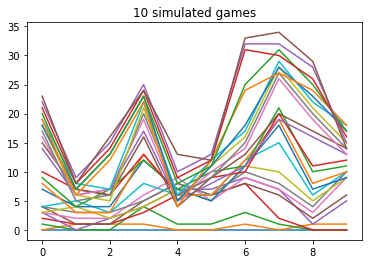

In [10]:
plt.plot(all_games)
plt.title('10 simulated games')
plt.show()

This doesn't look right. We seem to be plotting each element position rather than each game individually. We are going to have to transpose the data to get it in the format that we want. 

In [11]:
all_games_np = np.array(all_games)
print(all_games_np)

[[ 0  0  1  2  3  4  3  4  3  4  7  8  9 10 14 15 16 17 18 19 18 19 20 21
  22 23]
 [ 0  1  0  1  0  1  2  3  4  5  4  3  4  7  6  7  6  5  6  8  7  6  7  8
   9  8]
 [ 0  1  0  1  2  1  2  3  2  3  4  3  7  6  7  6  7  6  5  7 13 12 13 14
  15 16]
 [ 0  1  4  3  4  5  6  5  4  8 12 13 12 13 17 16 19 20 21 22 23 22 23 24
  25 24]
 [ 0  0  1  6  7  8  9  8  7  6  7  6  7  6  5  4  5  6  5  6  5  4  8  9
  10 13]
 [ 0  0  1  6  7  6  5  6  5  6  5  6 10  9  8  9 10  9 11 12 11 12 11 12
  13 12]
 [ 0  1  3  8  9  8  9 10 11 12 11 12 11 10 11 13 14 15 16 17 18 24 25 31
  32 33]
 [ 0  0  1  2  7  6  7  8 10 15 18 19 21 20 19 20 26 27 28 29 28 27 31 30
  32 34]
 [ 0  1  0  0  1  2  3  4  5  6  7  8 10 11 16 17 19 20 21 22 23 24 25 26
  28 29]
 [ 0  1  0  0  5  6  9 10  9 10  9 10 11 12 13 14 13 14 15 18 17 18 17 16
  15 14]]


In [12]:
print(np.transpose(all_games_np))

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  1  0  1  1]
 [ 1  0  0  4  1  1  3  1  0  0]
 [ 2  1  1  3  6  6  8  2  0  0]
 [ 3  0  2  4  7  7  9  7  1  5]
 [ 4  1  1  5  8  6  8  6  2  6]
 [ 3  2  2  6  9  5  9  7  3  9]
 [ 4  3  3  5  8  6 10  8  4 10]
 [ 3  4  2  4  7  5 11 10  5  9]
 [ 4  5  3  8  6  6 12 15  6 10]
 [ 7  4  4 12  7  5 11 18  7  9]
 [ 8  3  3 13  6  6 12 19  8 10]
 [ 9  4  7 12  7 10 11 21 10 11]
 [10  7  6 13  6  9 10 20 11 12]
 [14  6  7 17  5  8 11 19 16 13]
 [15  7  6 16  4  9 13 20 17 14]
 [16  6  7 19  5 10 14 26 19 13]
 [17  5  6 20  6  9 15 27 20 14]
 [18  6  5 21  5 11 16 28 21 15]
 [19  8  7 22  6 12 17 29 22 18]
 [18  7 13 23  5 11 18 28 23 17]
 [19  6 12 22  4 12 24 27 24 18]
 [20  7 13 23  8 11 25 31 25 17]
 [21  8 14 24  9 12 31 30 26 16]
 [22  9 15 25 10 13 32 32 28 15]
 [23  8 16 24 13 12 33 34 29 14]]


That's better, I'll plot the transposed version and see whether the result is right now. 

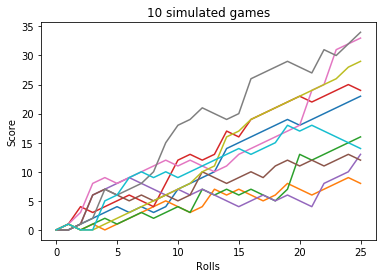

In [13]:
plt.plot(np.transpose(all_games_np))
plt.title('10 simulated games')
plt.xlabel('Rolls')
plt.ylabel('Score')
plt.show()

Much better. 

If we look at the state of the game and those rules that were defined at the beginning:
- - - -
The game has the following rules:
- [x] If you roll a 1 or a 2 then you move back a step
- [x] If you roll 3, 4, 5 then you move up a single step
- [x] If you roll a 6 then you roll again and move that number of steps
- [x] You cannot go below step 0
- [ ] Each roll there is a 0.1% chance that you will fall and set your steps to 0
- - - -
  <br>
It looks like the only rule that we are yet to enforce is the 0.1% chance of falling to the bottom of the staircase each roll. Another perfect opportunity to use `np.random`.

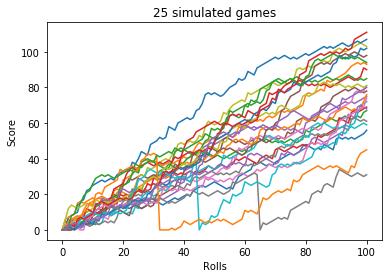

In [14]:
np.random.seed(2)
all_games = []
for i in range(25):
    steps =[0]
    for i in range(100):
        current_position = steps[-1]
        score = np.random.randint(1,7)
        if score < 3:
            step = max(0, current_position - 1)
        elif score < 6:
            step = current_position + 1
        else:
            step = current_position + np.random.randint(1,7)
        
        # Code our 0.1% fall chance here
        if np.random.rand() <= 0.001:
            step = 0
        
        steps.append(step)
        
    all_games.append(steps)

all_games_np = np.array(all_games)
plt.plot(np.transpose(all_games_np))

# Note that I increased the number of rolls and number of games so we saw a fall occur
plt.title('25 simulated games')
plt.xlabel('Rolls')
plt.ylabel('Score')
plt.show()

You can see the falls in those large dips in the score from the orange, the light blue and the grey lines. Across 2500 rolls, we saw a fall 3 times...

In [15]:
print(3 / 2500)

0.0012


That matches our rate of 0.1% chance of a fall.  <br>
<br>
That means that we have added all the simulated rules to the loop that we have for the game and simulated more, and longer, games to see that they are all working as intended. It would probably be good to wrap some of the functionality into functions and then call those so that the code is much more understandable. That will most likely be something I do in a separate notebook. 